# Web Scrape & EDA

##### Part 1: Web Scrape and build table
##### Part 2: Explanatory Data Analysis
##### Website: www.house.gov
##### Author: Pedro Sanhueza

In [1]:
# Web Scrape
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime


In [2]:
# Explanatory Data Analysis
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='notebook'
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# PART 1: Web Scrape
### URL: https://www.house.gov/representatives
### Extracted representative directory from url into a dataFrame


In [3]:
response = requests.get("https://www.house.gov/representatives")
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
tables = soup.select('table')

In [5]:
rows = []
for table in tables[:56]:
    row = {}
    row['District']             = [x.text.strip() for x in table.select('td')][0::6]
    row['Name']                 = [x.text.strip() for x in table.select('td')][1::6]
    row['Party']                = [x.text.strip() for x in table.select('td')][2::6]
    row['Office Room']          = [x.text.strip() for x in table.select('td')][3::6]
    row['Phone']                = [x.text.strip() for x in table.select('td')][4::6]
    row['Committee Assignment'] = [x.text.strip() for x in table.select('td')][5::6]
    row['State']                = table.select_one('caption').text.strip()
    rows.append(pd.DataFrame(row))

In [6]:
data = pd.concat(rows)
data

,District,Name,Party,Office Room,Phone,Committee Assignment,State
0,1st,"Carl, Jerry L.",R,1330 LHOB,(202) 225-4931,Armed Services|Natural Resources,Alabama
1,2nd,"Moore, Barry",R,1504 LHOB,(202) 225-2901,Agriculture|Veterans' Affairs,Alabama
2,3rd,"Rogers, Mike",R,2469 RHOB,(202) 225-3261,Armed Services,Alabama
3,4th,"Aderholt, Robert",R,266 CHOB,(202) 225-4876,Appropriations,Alabama
4,5th,"Brooks, Mo",R,2185 RHOB,(202) 225-4801,"Armed Services|Science, Space, and Technology",Alabama
...,...,...,...,...,...,...,...
4,5th,"Fitzgerald, Scott",R,1507 LHOB,(202) 225-5101,Education and Labor|Judiciary|Small Business,Wisconsin
5,6th,"Grothman, Glenn",R,1427 LHOB,(202) 225-2476,Budget|Education and Labor|Oversight and Reform,Wisconsin
6,7th,"Tiffany, Thomas P.",R,1719 LHOB,(202) 225-3365,Natural Resources|Judiciary,Wisconsin
7,8th,"Gallagher, Mike",R,1230 LHOB,(202) 225-5665,Armed Services|Intelligence|Transportation and...,Wisconsin


In [7]:
file_path = '../Representatives - Output/Representatives ' + datetime.now().strftime("%d-%m-%Y %H%M%S") + ".csv" # folder location with file name
data.to_csv(file_path) # save data frame as csv in file location

# PART 2: Exaplanatory Data Analysis

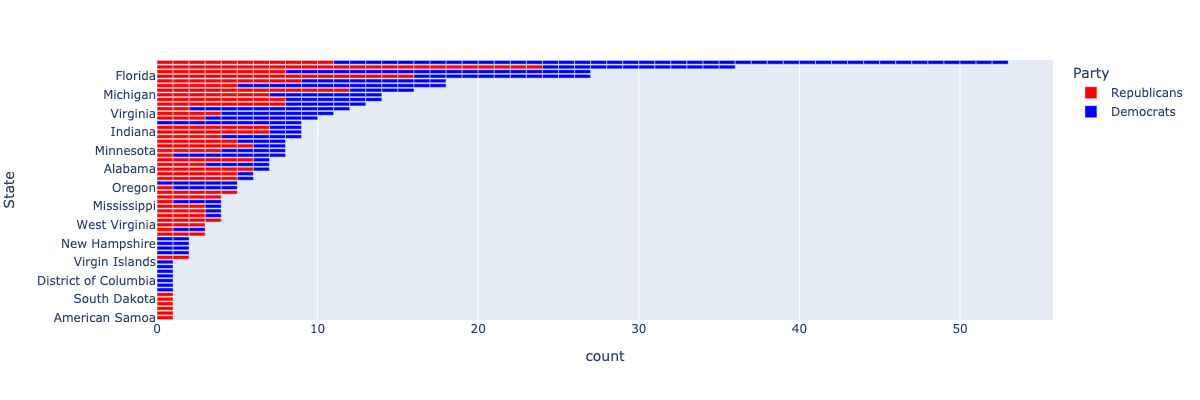

In [25]:
fig = px.bar(data,y='State',color='Party',color_discrete_map={'R':'red','D':'blue'},width=1200,height=400,orientation='h')

fig.update_layout(yaxis={'categoryorder':'total ascending'})
# fig.update_xaxes(tickangle=-45)

newnames = {'R':'Republicans','D':'Democrats'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show("png")

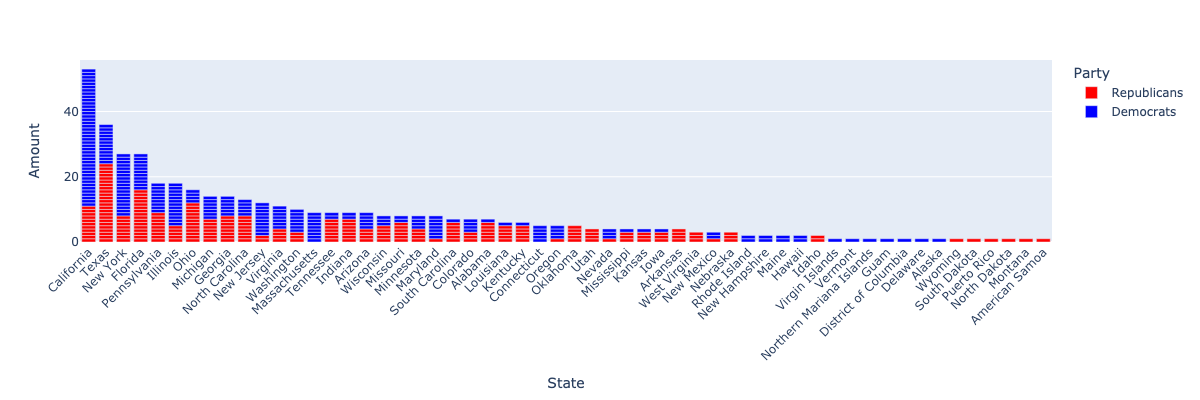

In [9]:
fig = px.bar(data, x='State', color='Party', color_discrete_map={'R': 'red','D': 'blue'},width=1200, height=400,labels={'count': 'Amount'})

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=-45)

newnames = {'R':'Republicans','D':'Democrats'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))

fig.show("png")

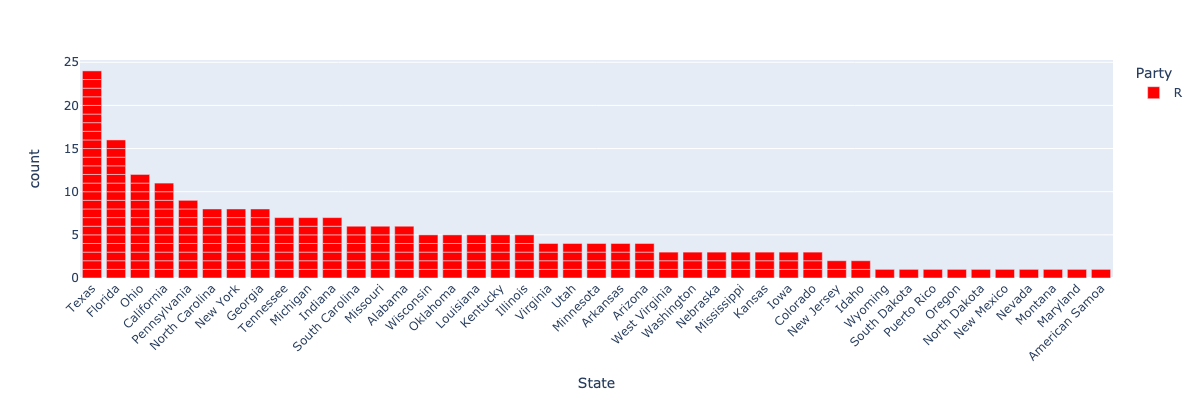

In [10]:
fig = px.bar(data[data.Party=='R'], x='State', color='Party', color_discrete_map={'R': 'red'},width=1200, height=400)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=-45)

newnames = {'R':'Republicans'}
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show("png")

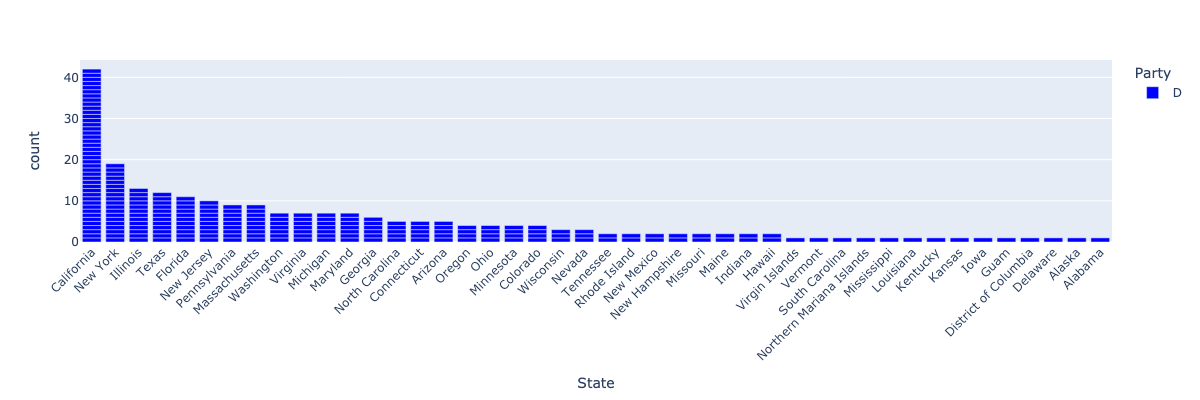

In [11]:
fig = px.bar(data[data.Party=='D'], x='State', color='Party', color_discrete_map={'D': 'Blue'},width=1200, height=400)

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_xaxes(tickangle=-45)

newnames = {'D':'Democrats'}
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show("png")

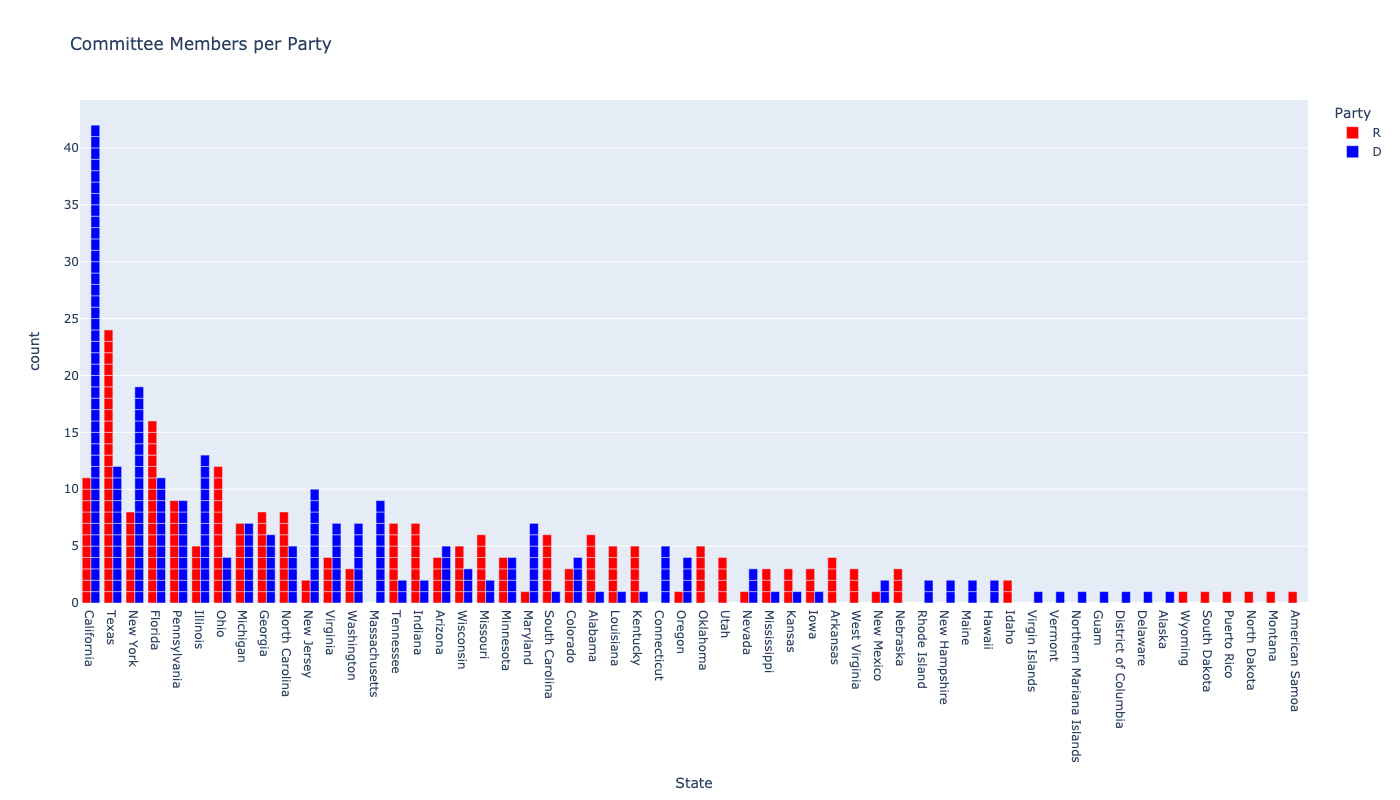

In [12]:
fig = px.bar(
    data,
    x='State',
    color='Party',
    color_discrete_map={'D': 'Blue', 'R':'Red'},
    title="Committee Members per Party",
    width=1400, height=800,
    barmode="group"
    )

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show("png")

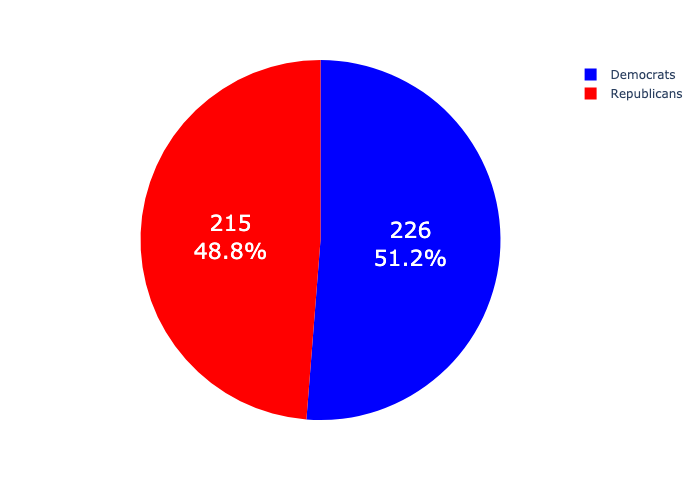

In [13]:
newnames = {'R':'Republicans','D':'Democrats'}

fig = px.pie(
    data['Party'].replace(newnames),
    names='Party',
    color='Party',
    color_discrete_map={'Republicans':'Red','Democrats':'Blue'}
)

fig.update_traces(textfont_size=22,textinfo='percent+value')

fig.show("png")

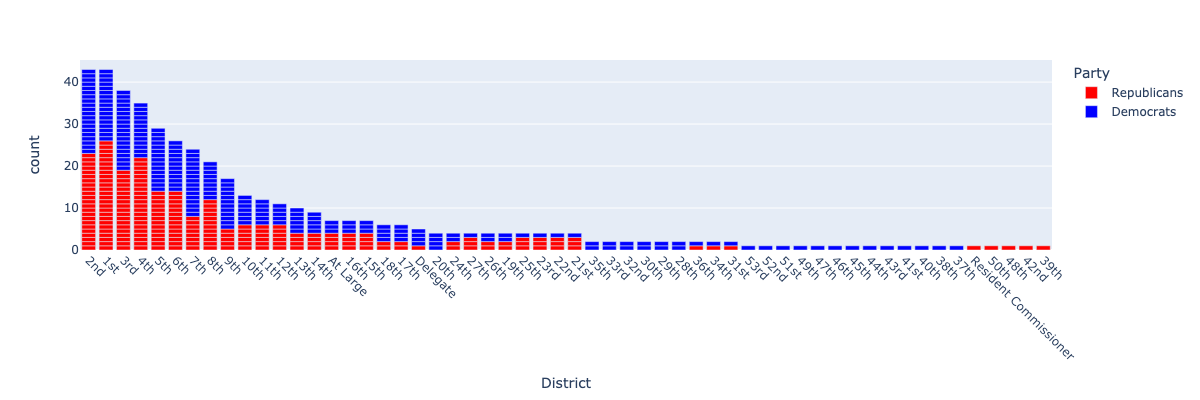

In [14]:
fig = px.bar(data, x='District', color='Party', color_discrete_map={'D': 'Blue', 'R':'Red'},width=1200, height=400)

fig.update_layout(xaxis={'categoryorder':'total descending'})
newnames = {'R':'Republicans','D':'Democrats'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.update_xaxes(tickangle=45)
fig.show("png")

In [15]:
data_melt_committee = data.copy()
data_melt_committee[[0,1,2,3,4,5]] = data['Committee Assignment'].str.split('|',expand=True)
data_melt_committee.drop('Committee Assignment',axis=1, inplace=True)
data_melt_committee = data_melt_committee.melt(id_vars=['District','Name','Party','Office Room','Phone','State'],value_name='Committee Assignment')
data_melt_committee = data_melt_committee[~data_melt_committee['Committee Assignment'].isnull()].drop('variable',axis=1)


,index,Committee Assignment
0,Transportation and Infrastructure,68
1,Armed Services,59
2,Appropriations,59
3,Energy and Commerce,58
4,Financial Services,54
5,Education and Labor,53
6,Agriculture,51
7,Foreign Affairs,50
8,Natural Resources,47
9,Oversight and Reform,45


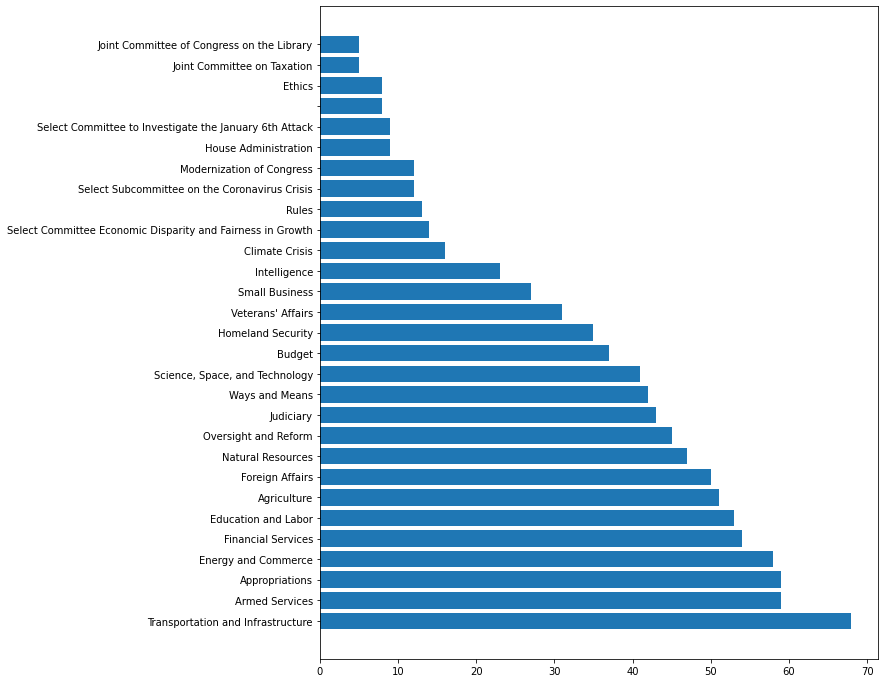

In [16]:
names = data_melt_committee['Committee Assignment'].value_counts().reset_index()['index']
values = data_melt_committee['Committee Assignment'].value_counts().reset_index()['Committee Assignment']

fig, axs = plt.subplots(figsize=(10, 12), sharey=True)
axs.barh(names, values,align='center')

data_melt_committee['Committee Assignment'].value_counts().reset_index()

In [17]:
b = data_melt_committee[['Committee Assignment','Party']].copy()
b.insert(2,'num',1)
b['Party']=b['Party'].replace({'R':'Republican','D':'Democratic'})

print(
    """
    TABLE: Representatives amount per Party, grouped by Commemitee
    """
)

pd.pivot_table(
    b, #dataset
    values='num',
    index=['Committee Assignment'],
    columns=['Party'],
    aggfunc=np.sum,
    fill_value=0
    ).reset_index().sort_values('Democratic')


    TABLE: Representatives amount per Party, grouped by Commemitee
    


Party,Committee Assignment,Democratic,Republican
14,Joint Committee of Congress on the Library,3,2
15,Joint Committee on Taxation,3,2
8,Ethics,4,4
0,,4,4
12,House Administration,6,3
17,Modernization of Congress,6,6
24,Select Subcommittee on the Coronavirus Crisis,7,5
23,Select Committee to Investigate the January 6t...,7,2
22,Select Committee Economic Disparity and Fairne...,8,6
5,Climate Crisis,9,7


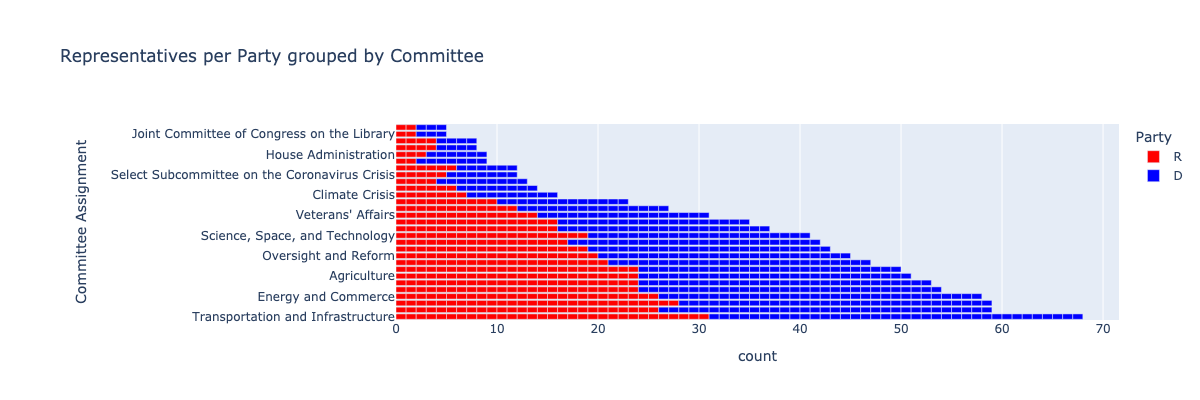

In [18]:
fig = px.bar(
    data_melt_committee,
    y='Committee Assignment',
    color='Party',
    color_discrete_map={'D': 'Blue', 'R':'Red'},
    orientation='h',
    title="Representatives per Party grouped by Committee",
    width=1200, height=400
    )

fig.update_layout(
    yaxis={'categoryorder':'total descending'})

newnames = {'R':'Republicans','D':'Democrats'}

fig.show("png")

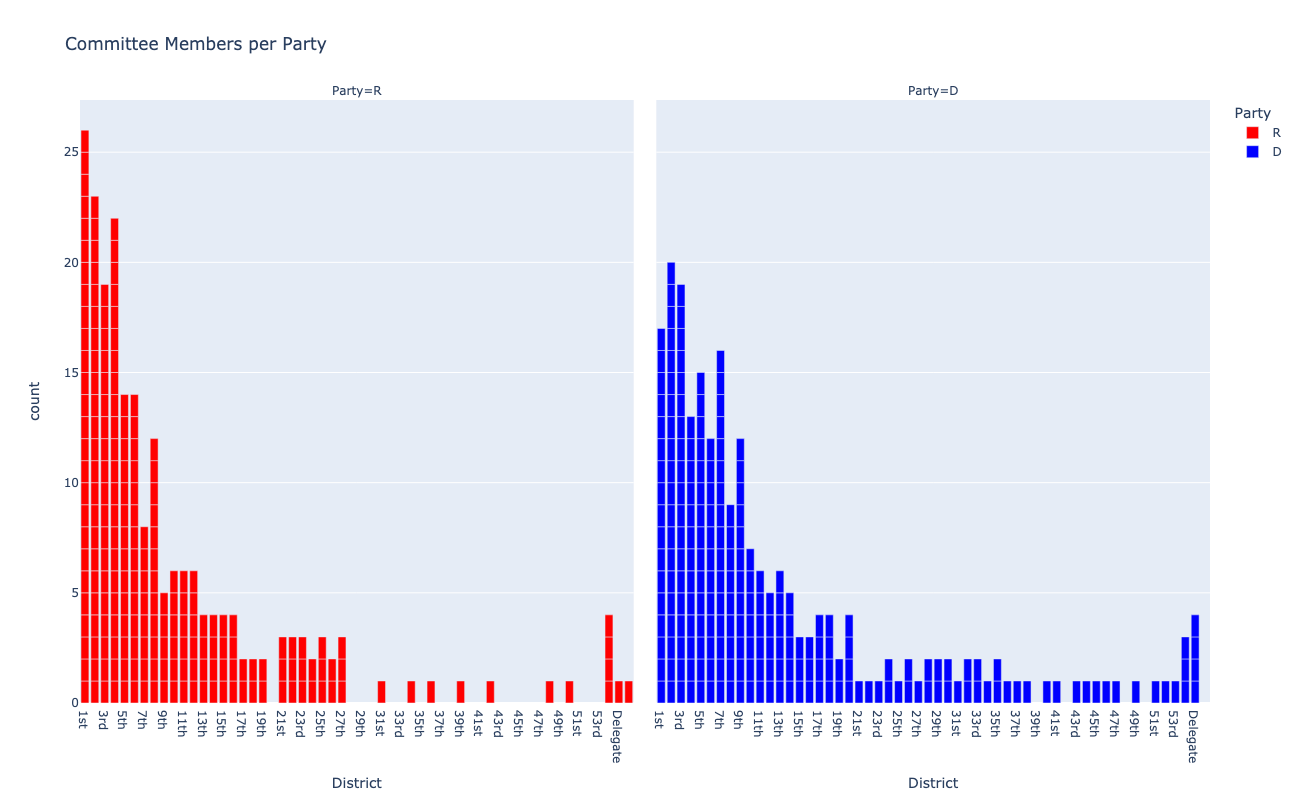

In [19]:
order = {'District':['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th' ,'11th','12th','13th','14th','15th','16th','17th','18th','19th','20th','21st','22nd','23rd','24th','25th','26th','27th','28th','29th','30th','31st','32nd','33rd','34th','35th','36th','37th','38th','39th','40th','41st','42nd','43rd','44th','45th','46th','47th','48th','49th','50th','51st','52nd','53rd','At Large', 'Delegate','Resident Commissioner']}

fig = px.bar(
    data,
    x='District',
    color='Party',
    color_discrete_map={'D': 'Blue', 'R':'Red'},
    title="Committee Members per Party",
    width=1300, height=800,
    # barmode="group",
    category_orders=order,
    facet_col="Party"
    )

# fig.update_layout(xaxis={'categoryorder':'total descending'})

newnames = {'R':'Republicans','D':'Democrats'}

# display
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name])) # Interactive graph does not show up on GitHub
fig.show("png")

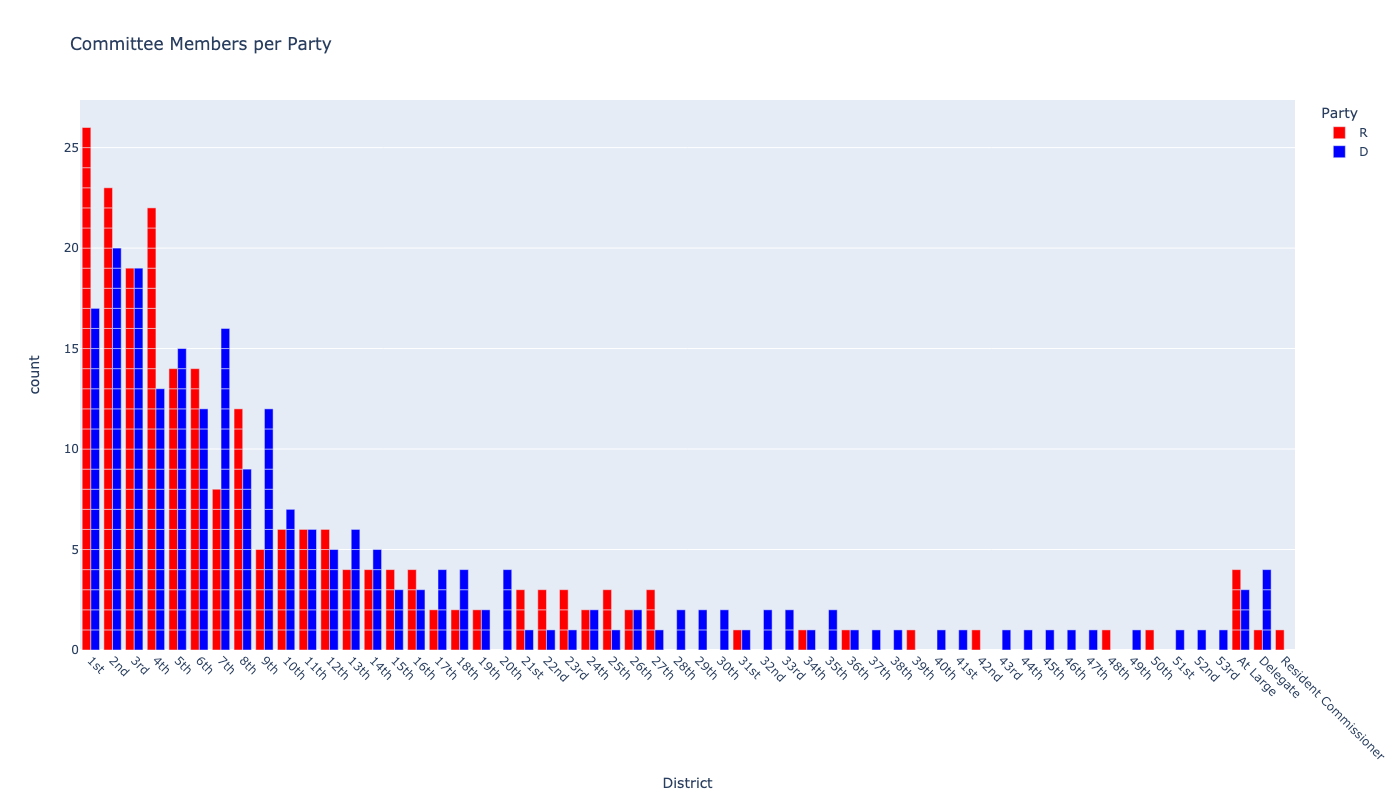

In [20]:
fig = px.bar(
    data,
    x='District',
    color='Party',
    color_discrete_map={'D': 'Blue', 'R':'Red'},
    title="Committee Members per Party",
    width=1400, height=800,
    barmode="group",
    category_orders=order
    )
fig.update_xaxes(tickangle=45)
fig.show("png")

In [21]:
b = data_melt_committee[data_melt_committee['Committee Assignment']==''][['Party','State','Name','Committee Assignment']]
b['Party']=b['Party'].replace({'R':'Republican','D':'Democratic'})
b['Committee Assignment']=b['Committee Assignment'].replace({'':'Non-Assignment'})

print(
    f"""
    TABLE: Representatives WITHOUT Committee Assignment

    REPUBLICAN: {b[b['Party']=='Republican']['Party'].count()}
    DEMOCRATIC: {b.Party.where(lambda x: x=='Democratic').count()}
    """
) # different ways to count series

b.sort_values(['Party','State','Name'])

# pd.pivot_table(
#     b,
#     values='num',
#     index=['Name','State','Committee Assignment'],
#     columns=['Party'],
#     aggfunc=np.sum,
#     fill_value=0
#     ).reset_index().sort_values('Democratic')



    TABLE: Representatives WITHOUT Committee Assignment

    REPUBLICAN: 4
    DEMOCRATIC: 4
    


,Party,State,Name,Committee Assignment
33,Democratic,California,"Pelosi, Nancy",Non-Assignment
101,Democratic,Florida,"Crist, Charlie- Vacancy",Non-Assignment
110,Democratic,Florida,"Deutch, Theodore E.- Vacancy",Non-Assignment
188,Democratic,Maryland,"Hoyer, Steny H.",Non-Assignment
12,Republican,Arizona,"Gosar, Paul A.",Non-Assignment
44,Republican,California,"McCarthy, Kevin",Non-Assignment
129,Republican,Georgia,"Greene, Marjorie Taylor",Non-Assignment
154,Republican,Indiana,"Yakym, Rudy",Non-Assignment


In [22]:
b[b['Party']=='Democratic']['Party'].count()

4

In [23]:
data_melt_committee['Committee Assignment'].nunique()

29

In [27]:
requests.session().cookies.keys()

[]